# Problem Statement 

 Salary_hike -> Build a prediction model for Salary_hike

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read Data
df = pd.read_csv("E:\data science excelr\(4)Simple linear regression\Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
#Data Description
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
#Correlation Analysis

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

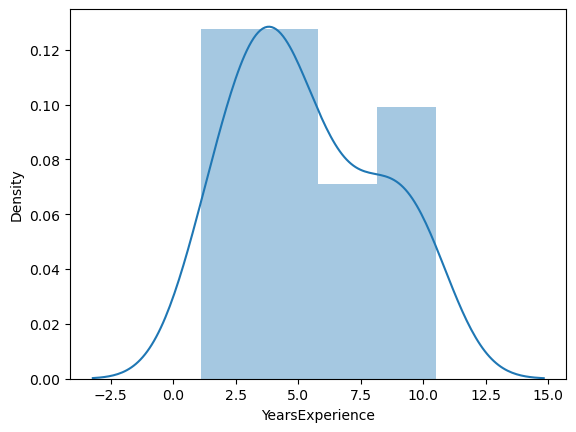

In [5]:
sns.distplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

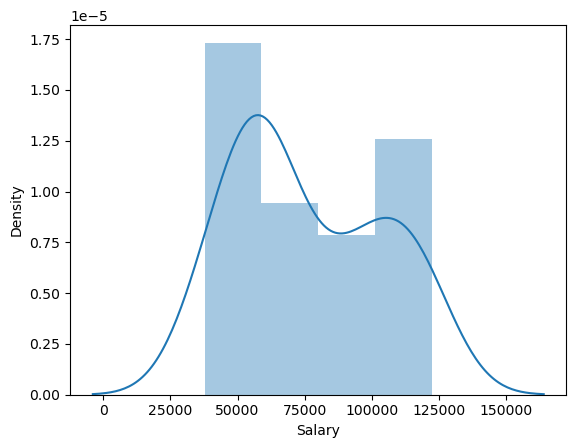

In [6]:
sns.distplot(df['Salary'])

In [7]:
df['Salary'].skew()

0.35411967922959153

In [8]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
#import statsmodel

In [10]:
import statsmodels.formula.api as smf

In [11]:
model = smf.ols('YearsExperience~Salary', data=df).fit()

In [12]:
#Model Parameters

In [13]:
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [14]:
#line equation
x = 250

y =  0.000101*x+-2.383161
y

-2.3579109999999996

In [15]:
#Print values for t value and p value
print(model.tvalues)
print(model.pvalues)

Intercept    -7.281283
Salary       24.950094
dtype: float64
Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [16]:
#r2 value
model.rsquared

0.9569566641435086

# Prediction for New Data

In [17]:
df.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [18]:
newdf = pd.DataFrame({
     'Salary' : [20000,12000,10000,9000,50000,22000]
})
newdf

,Salary
0,20000
1,12000
2,10000
3,9000
4,50000
5,22000


In [19]:
model.predict(newdf)

0   -0.357847
1   -1.167973
2   -1.370504
3   -1.471770
4    2.680122
5   -0.155316
dtype: float64

# Data Transformation

In [20]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

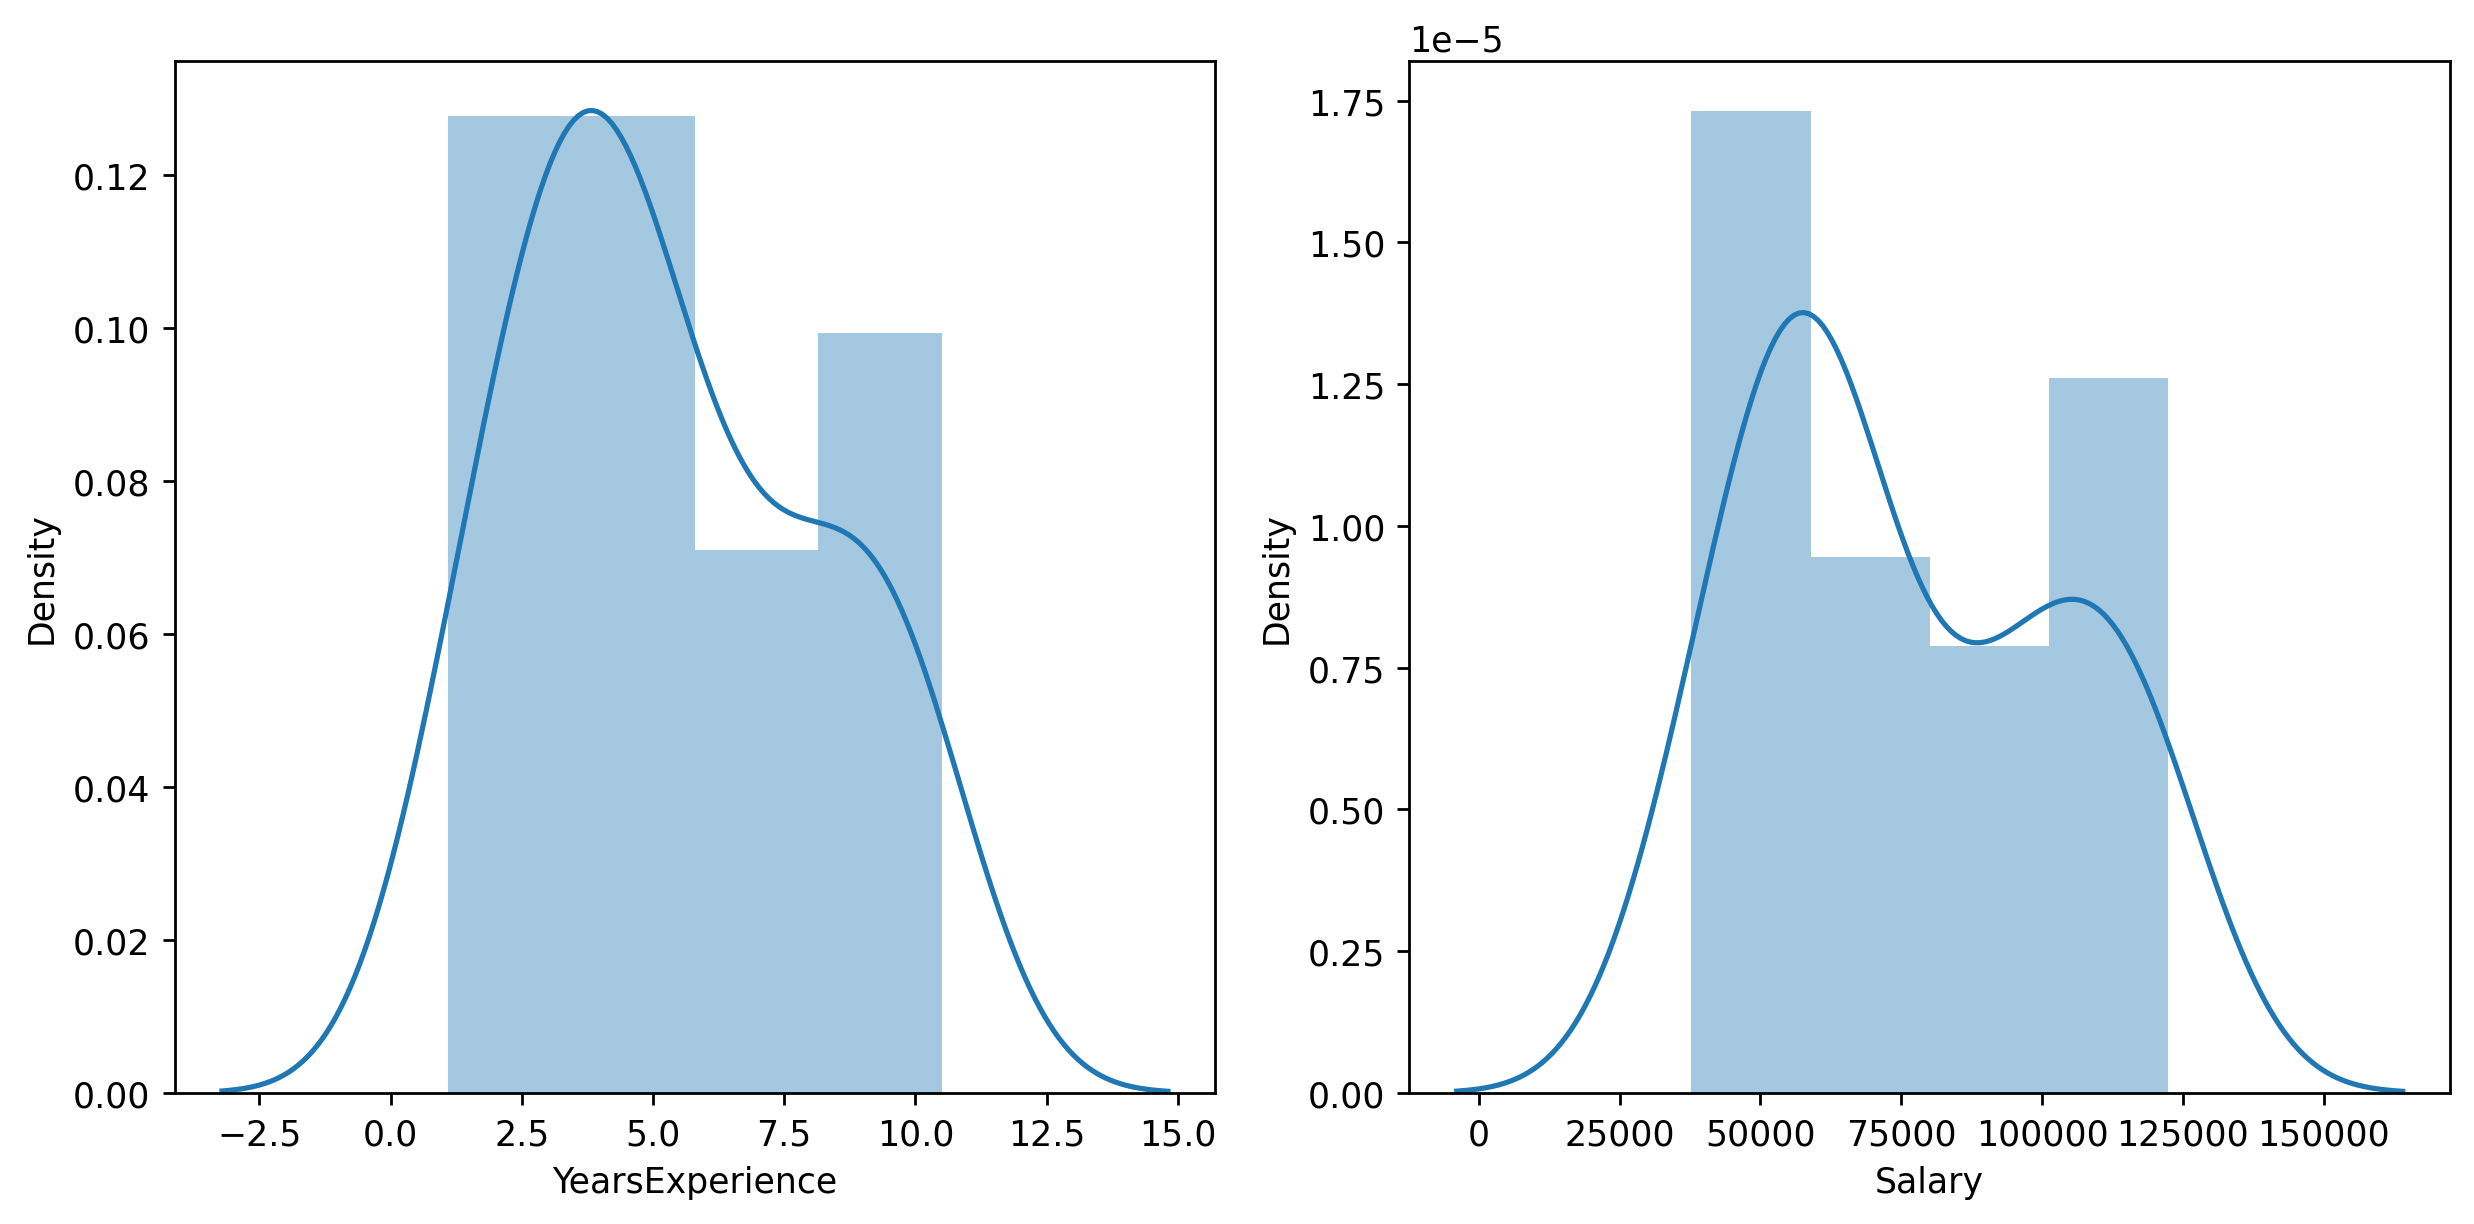

In [21]:
plt.subplot(1,2,1)
sns.distplot(df['YearsExperience'])

plt.subplot(1,2,2)
sns.distplot(df['Salary'])
plt.tight_layout()

# Log Transformation

In [22]:
df['log_YearsExperience'] = np.log(df['YearsExperience'])
df.head()

,YearsExperience,Salary,log_YearsExperience
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


In [23]:
df['log_Salary'] = np.log(df['Salary'])
df.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906


<AxesSubplot:xlabel='log_Salary', ylabel='Density'>

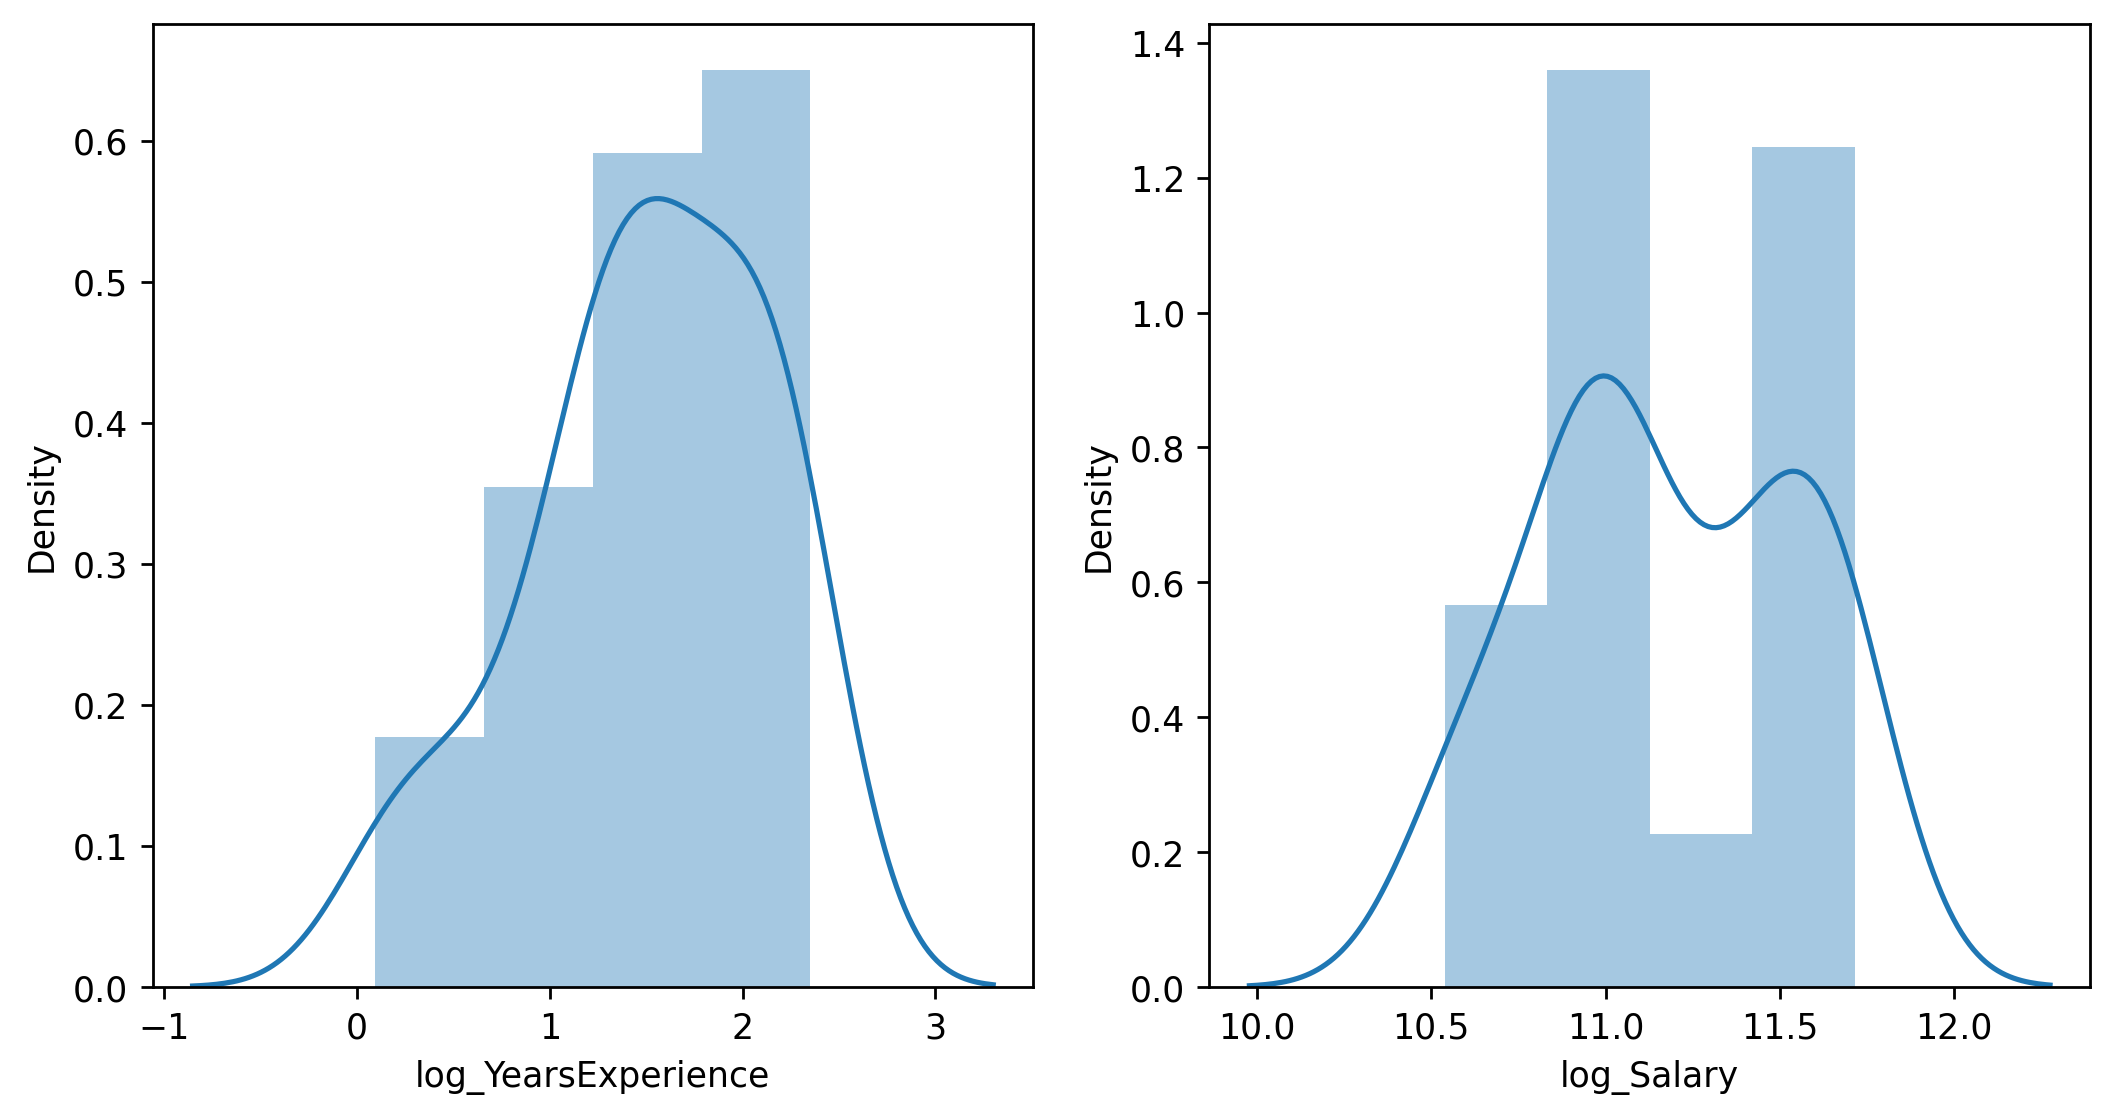

In [24]:
plt.subplot(1,2,1)
sns.distplot(df['log_YearsExperience'])

plt.subplot(1,2,2)
sns.distplot(df['log_Salary'])

In [25]:
df['log_Salary'].skew()

-0.044126086756988495

In [26]:
df['sqrt_Salary'] = np.sqrt(df['Salary'])
df.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary,sqrt_Salary
0,1.1,39343.0,0.095310,10.580073,198.350700
1,1.3,46205.0,0.262364,10.740843,214.953483
2,1.5,37731.0,0.405465,10.538237,194.244691
3,2.0,43525.0,0.693147,10.681091,208.626460
4,2.2,39891.0,0.788457,10.593906,199.727314


In [27]:
df['sqrt_Salary'].skew()

0.16904336802767353

# Model Prediction

In [28]:
model.predict(newdf)

0   -0.357847
1   -1.167973
2   -1.370504
3   -1.471770
4    2.680122
5   -0.155316
dtype: float64

# Exponential Transformation

In [29]:
model2= smf.ols('np.log(Salary)~YearsExperience', data=df).fit()

In [30]:
#Model summary

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Fri, 30 Jun 2023   Prob (F-statistic):           7.03e-18
Time:                        18:46:00   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#model parameters

model2.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [32]:
#Print values for t value and p value

print(f"t value is\n{model2.tvalues}\nP value is\n {model2.pvalues}")

t value is
Intercept          273.327166
YearsExperience     19.584833
dtype: float64
P value is
 Intercept          1.604634e-49
YearsExperience    7.027439e-18
dtype: float64


In [33]:
#R squared value

model2.rsquared, model2.rsquared_adj

(0.9319671194084195, 0.9295373736730059)

# Quadratic Model

In [34]:
df['YearsExperience_sq']= df.YearsExperience*df.YearsExperience

In [35]:
model3= smf.ols('Salary~YearsExperience+YearsExperience_sq', data=df).fit()

In [36]:
#Model Summary

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Fri, 30 Jun 2023   Prob (F-statistic):           3.59e-19
Time:                        18:46:00   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
YearsExperience     9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
YearsExperience_sq    16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#Model parameters

model3.params

Intercept             26214.932677
YearsExperience        9259.283888
YearsExperience_sq       16.392566
dtype: float64

In [38]:
#Print values for t value and p value

print(f"t value is\n{model3.tvalues}\nP value is\n {model3.pvalues}")

t value is
Intercept             5.755611
YearsExperience       5.112783
YearsExperience_sq    0.107760
dtype: float64
P value is
 Intercept             0.000004
YearsExperience       0.000022
YearsExperience_sq    0.914983
dtype: float64


In [39]:
#R squared value

model3.rsquared, model3.rsquared_adj

(0.956975168321065, 0.953788143752255)